# BEATS DMM commissioning - energy scans
- Mo 0.2 mm

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   28/11/2023

Last update:  28/11/2023
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
import dxchange
# from pandas_ods_reader import read_ods
# import h5py

astropy module not found
olefile module not found


In [63]:
from DMM.commissioning.tomoalign_simple import fit_profile

In [60]:
# plt.style.use('seaborn-v0_8-talk')
plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [33]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [29]:
matplotlib.rcParams['figure.dpi'] = 300

In [12]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/'

## 1. Mo
### 1.1 Read SSCAN data

In [13]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Mo/DMM_Mo_scan_003.h5'

In [14]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


In [51]:
ML1_p_mo = [-0.778193552, -0.776018853, -0.773714302, -0.771424896, -0.769119601, -0.766819519, -0.764547245, -0.762239963, -0.759953785, -0.757660655, -0.755385154, -0.753071416, -0.750799887, -0.748481433, -0.746211145, -0.743903615, -0.741613713, -0.739331259, -0.737041357, -0.734738792, -0.732442931, -0.730161967, -0.7278815, -0.72557968, -0.723280344, -0.720985476, -0.718695325, -0.716408651, -0.714106087, -0.711814943, -0.709529758, -0.707231415, -0.704974286, -0.702652852, -0.700352273, -0.698071558, -0.695776938, -0.693474126, -0.691196389, -0.688904997, -0.686606654 ]
ML2_p_mo = [-0.778207213, -0.775972678, -0.773692956, -0.771401564, -0.76909751, -0.766803635, -0.764513484, -0.762228548, -0.759916797, -0.75764204, -0.755340469, -0.75303989, -0.750766871, -0.748477466, -0.746160998, -0.743860171, -0.741569276, -0.739283098, -0.737009582, -0.734700811, -0.73243102, -0.730112317, -0.727819187, -0.725543437, -0.723269673, -0.720948487, -0.718654364, -0.716370918, -0.714075802, -0.711779692, -0.709499225, -0.707223475, -0.704917683, -0.702600718, -0.700337879, -0.698029852, -0.695743674, -0.693449303, -0.691181249, -0.688873719, -0.686585307]
ML1_p_flat = [-0.778208945, -0.775998245, -0.773700895, -0.771418193, -0.769135739, -0.766835409, -0.764525644, -0.762239963, -0.759974144, -0.757656683, -0.755397071, -0.753099472, -0.750774314, -0.748508495, -0.74622058, -0.743906842, -0.741617189, -0.73932381, -0.737043343, -0.73474053, -0.732449138, -0.730166188, -0.727888204, -0.72557397, -0.723278109, -0.720987214, -0.718699546, -0.716396733, -0.714096404, -0.711812957, -0.709516848, -0.707229428, -0.704962368, -0.702665018, -0.700374122, -0.698083972, -0.69577818, -0.693482319, -0.6911949, -0.688930819, -0.68661882]
ML2_p_flat = [-0.778202993, -0.775981865, -0.773692459, -0.771388901, -0.769111165, -0.766807359, -0.764508022, -0.762210423, -0.759921266, -0.757649489, -0.755349159, -0.753045353, -0.750743036, -0.748440472, -0.746171425, -0.743879537, -0.74159907, -0.739295264, -0.736998658, -0.734724149, -0.732416619, -0.730138138, -0.727836815, -0.725538471, -0.723245341, -0.720952212, -0.71865933, -0.716388546, -0.714071084, -0.711789127, -0.709498977, -0.70720684, -0.704918428, -0.702605932, -0.700340113, -0.698043011, -0.695736722, -0.693446572, -0.69117827, -0.688866023, -0.686598962]

### 1.2 Correct flat-field

In [19]:
data_mo = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_mo.shape)

(41, 2160, 2560)


In [20]:
data_norm = data_mo/data_flat

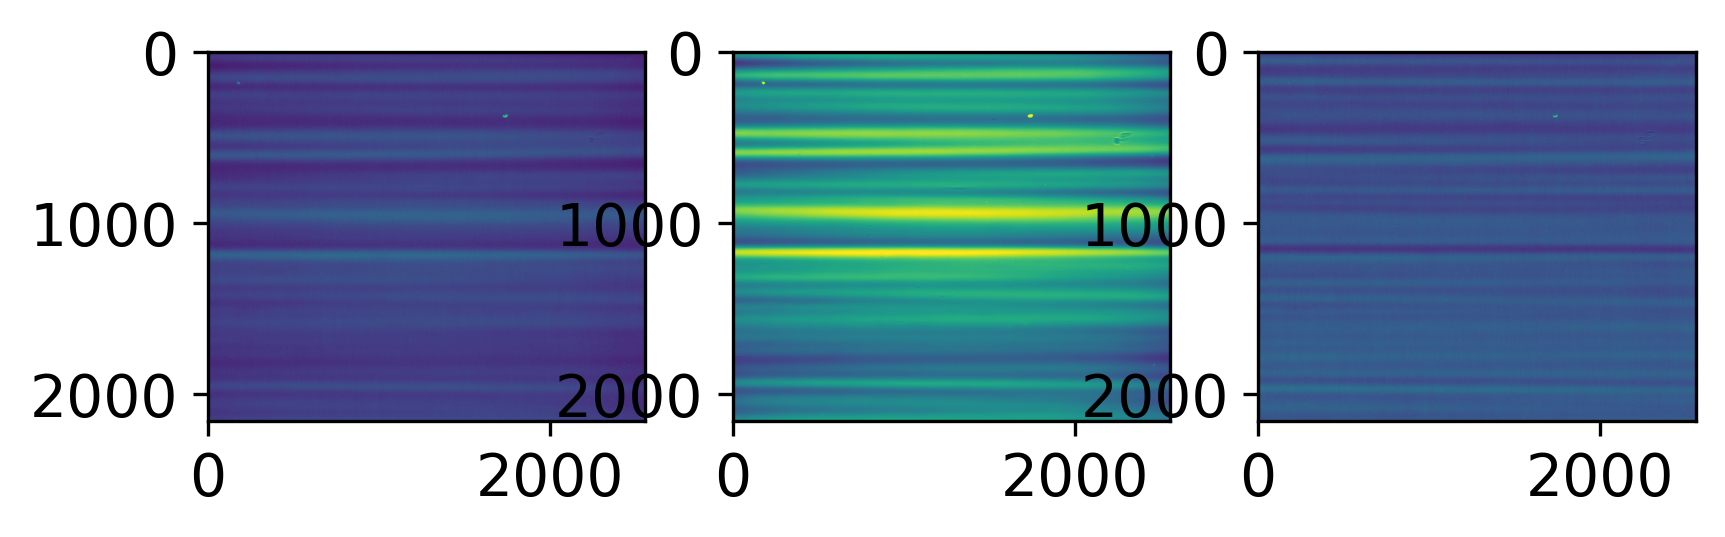

In [34]:
step = 21
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_mo[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 1.3 Get intensity average for each step

In [41]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

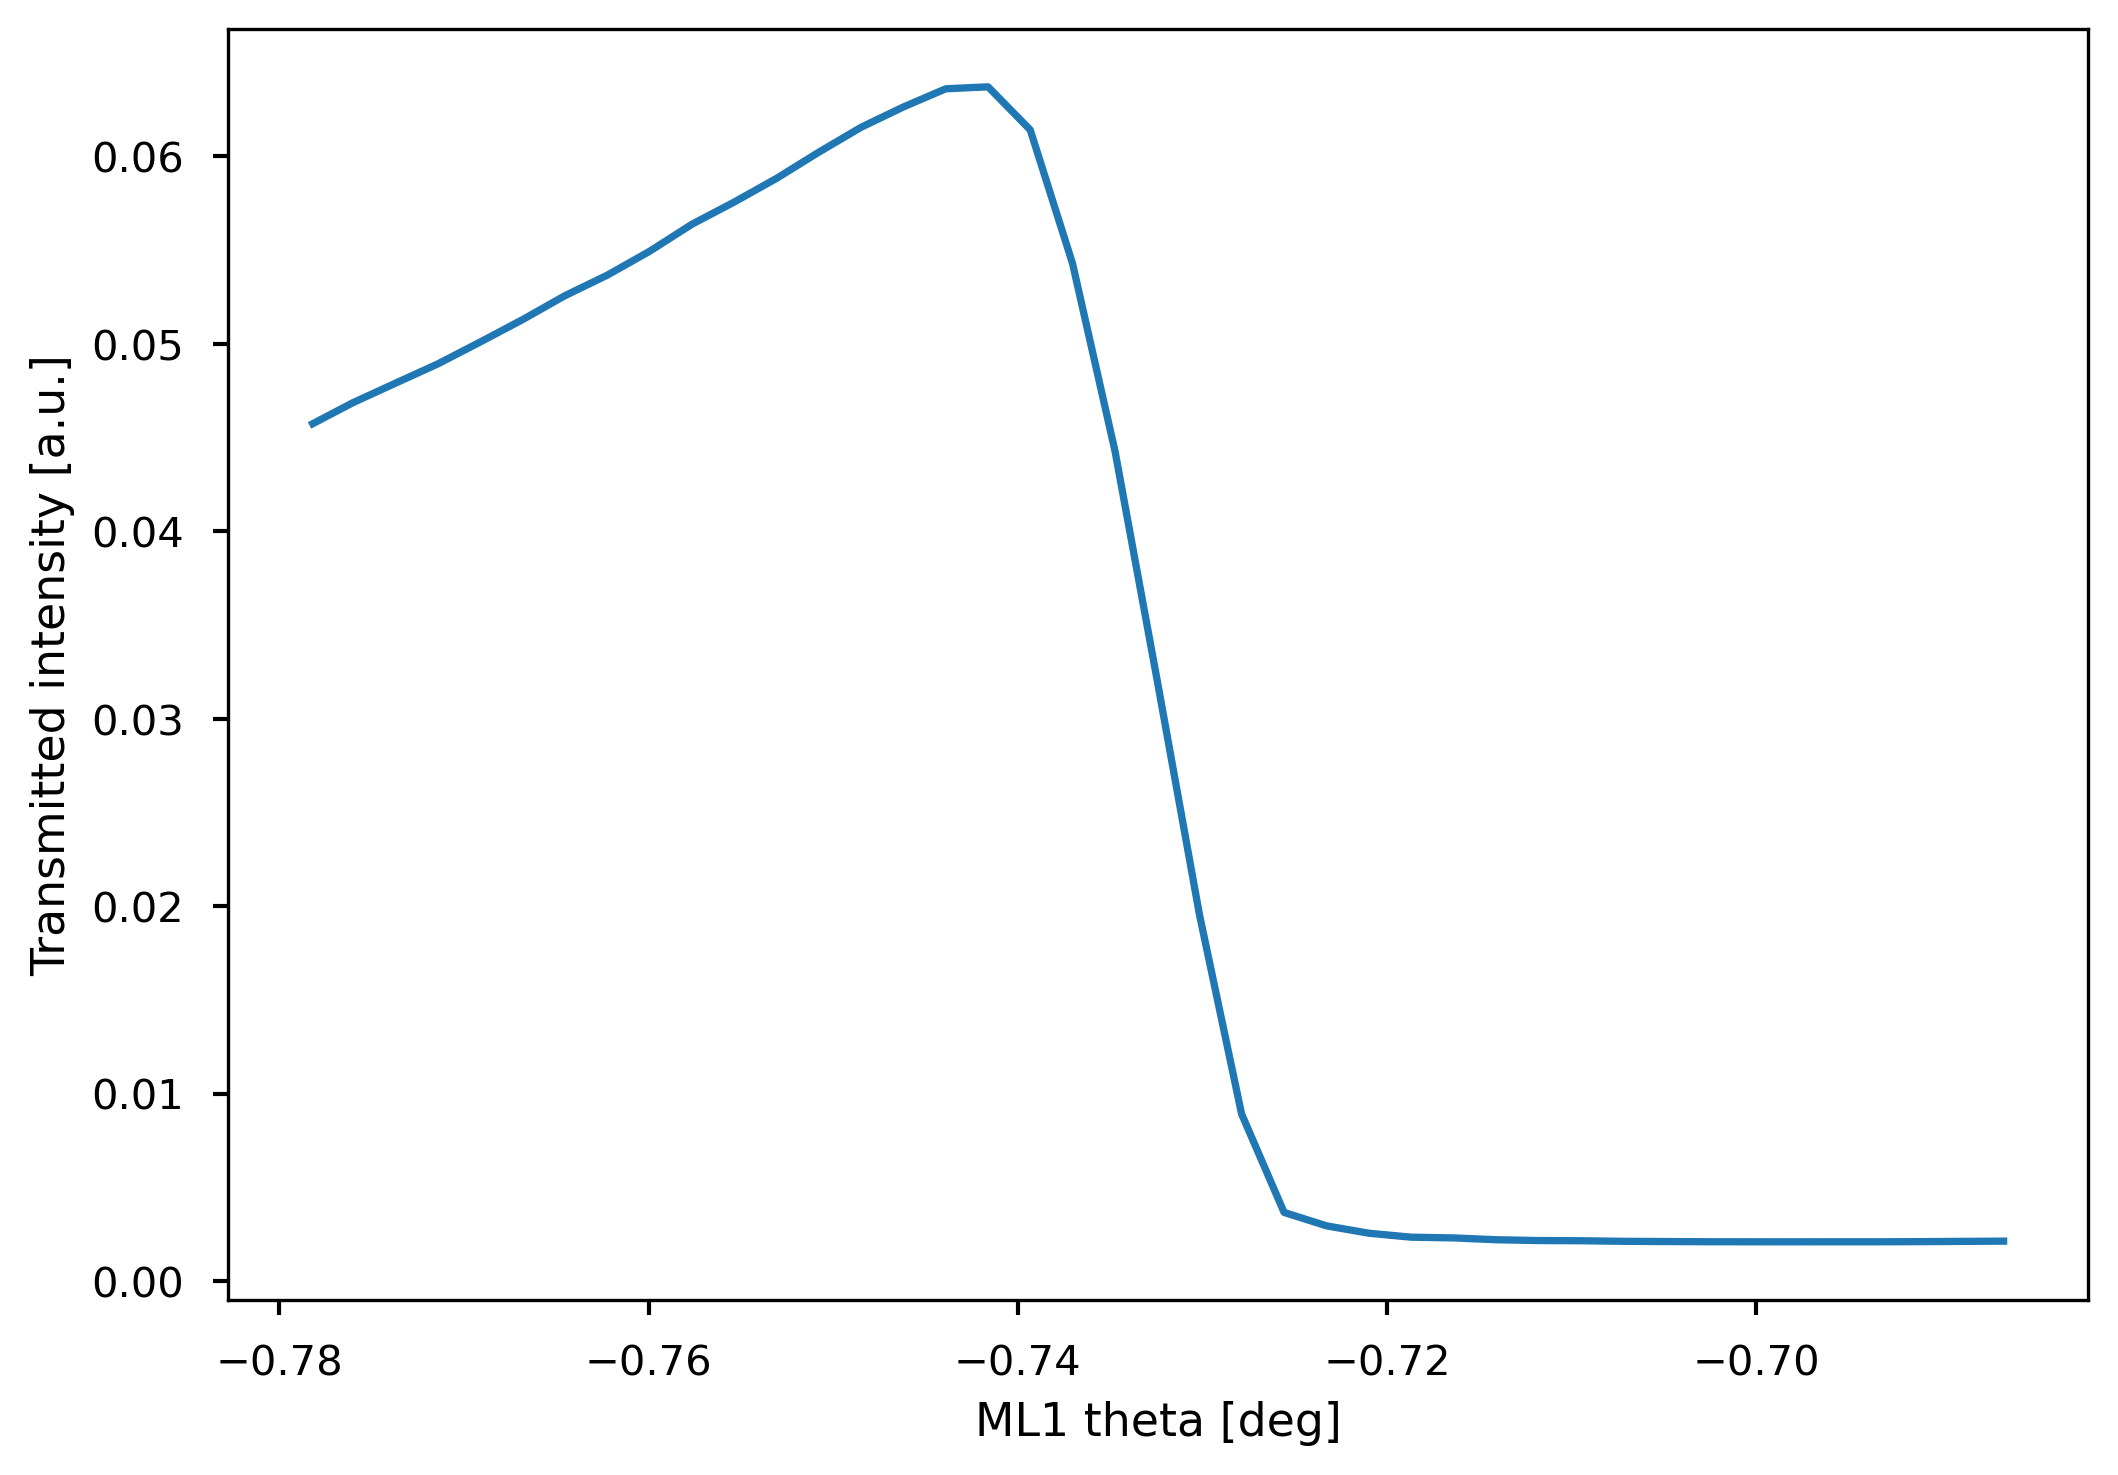

In [61]:
plt.plot(ML1_p_mo,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 1.4 Perform curve fit

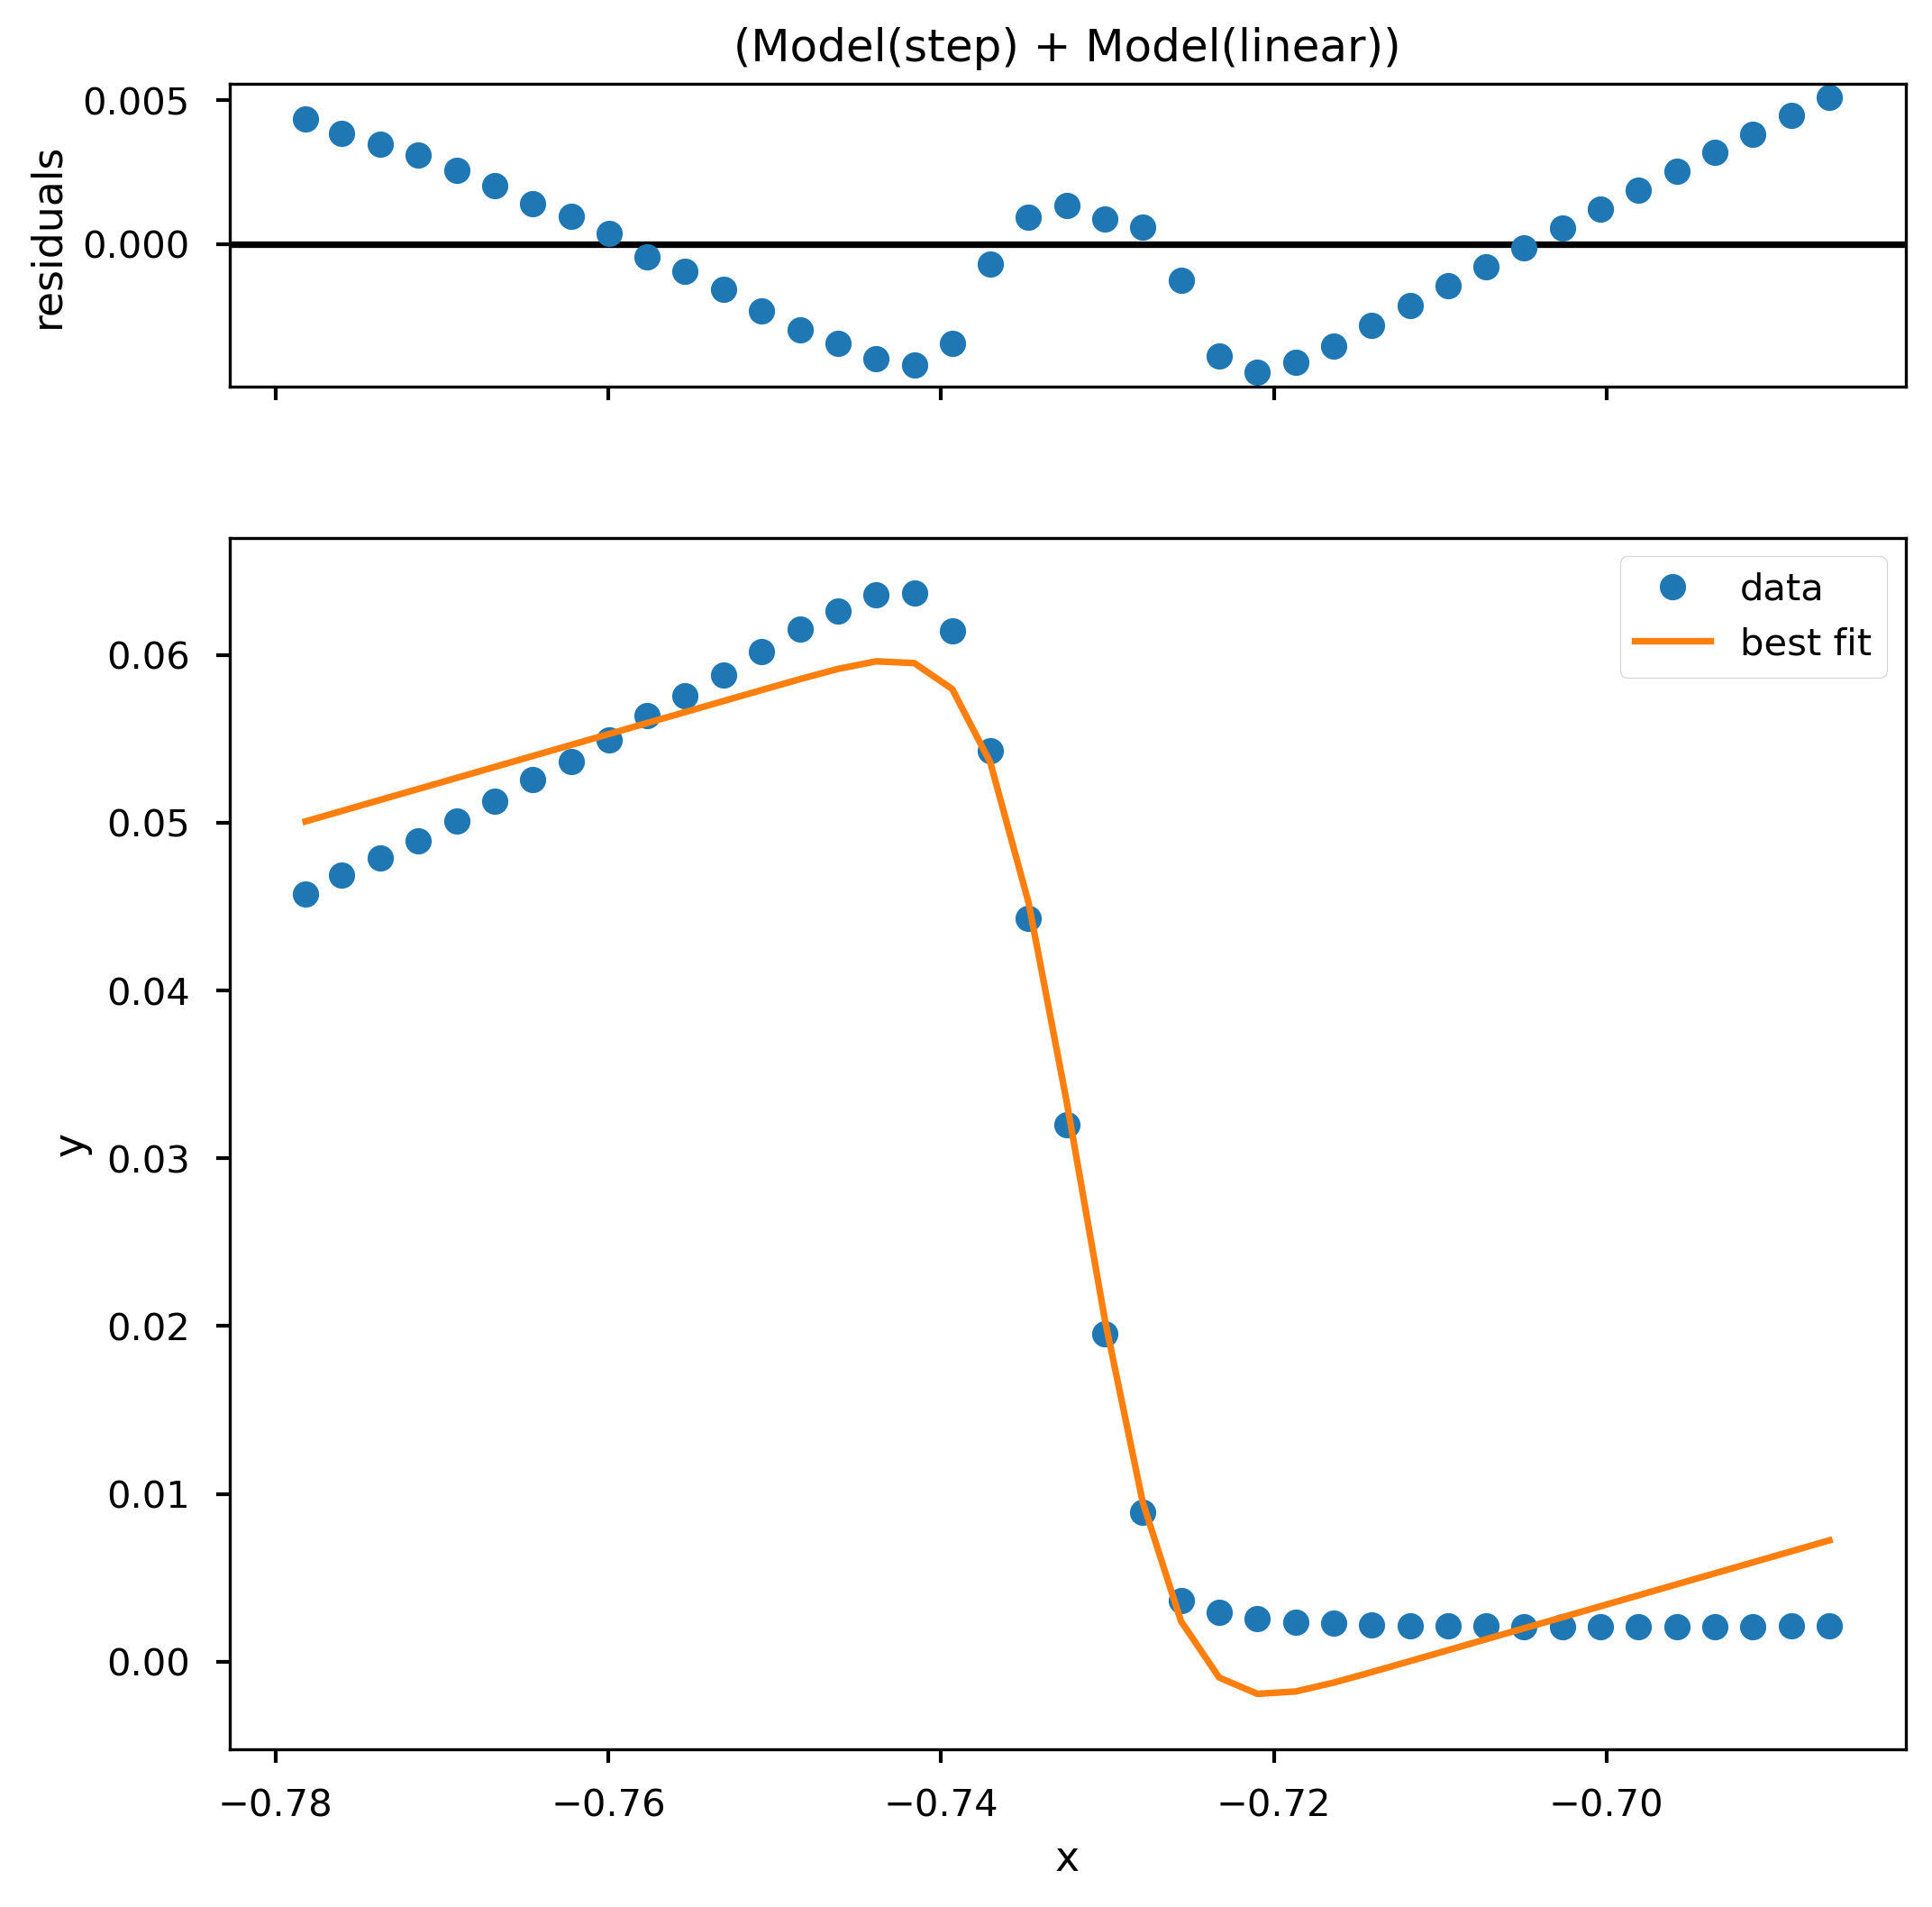

In [67]:
fit_profile(ML1_p_mo, I_norm, profile='step', background='linear', plot=True) # , width=1400